In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.ibmq.providers.managed import IBMQJobManager
# from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

In [3]:
from scipy.optimize import curve_fit
from copy import copy, deepcopy
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

def int_to_pauli(i,n):
    p = np.base_repr(i,base=4)
    p = '0'*(n-len(p)) + p
    p = p.replace('0','I').replace('1', 'X').replace('2', 'Y').replace('3', 'Z')
    return p

def commute(p,q):
    c = 1
    n = len(p)
    for i in range(n):
        if p[i] != 'I' and q[i] != 'I':
            if p[i] != q[i]:
                c *= -1
    return c

def fidelity_to_error(pauli_fidelity,n):
    N = 4**n
    pauli_error = {}
    for i in range(N):
        p = int_to_pauli(i,n)
        pauli_error[p] = 0
        for j in range(N):
            q = int_to_pauli(j,n)
            pauli_error[p] += pauli_fidelity[q] * commute(p,q) / N
    return pauli_error
    

In [4]:
import random   

# #only eliminate one element in bootstrapping
# def bootstrap_fit_EAB_plot(X, xeb_list):
#     full_list=deepcopy(xeb_list)
#     alpha_rtn_frm_fit=[0]*10
#     alpha_err_rtn_frm_fit=[0]*10
#     a_rtn_frm_fit=[0]*10
#     Y_rtn_frm_fit=[0]*10
#     Yerr_rtn_frm_fit=[0]*10
#     for i in range (10):
#         xeb_list_temp=deepcopy(full_list)
#         for j in X:
#             r=random.randint(0, 19)
# #             print ("before random removal", len(xeb_list_temp[j]))
#             xeb_list_temp[j].remove(xeb_list_temp[j][r])
# #             print ("after random removal", len(xeb_list_temp[j]))
#             assert len(xeb_list_temp[j])==19
# #         print (i)
#         alpha_rtn_frm_fit[i], a_rtn_frm_fit[i],alpha_err_rtn_frm_fit[i],Y_rtn_frm_fit[i],Yerr_rtn_frm_fit[i]= fit_EAB_plot(X, xeb_list_temp)
# #         print (alpha_rtn_frm_fit[i])
#     alpha_bootstrap=np.mean(alpha_rtn_frm_fit)
#     alpha_err_bootstrap=np.std(alpha_rtn_frm_fit)
#     return alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit
    
# #specify number of elements to resample : rs
# def bootstrap_fit_EAB_plot_rs(X, xeb_list,rs):
#     full_list=deepcopy(xeb_list)        
#     alpha_rtn_frm_fit=[0]*10
#     alpha_err_rtn_frm_fit=[0]*10
#     a_rtn_frm_fit=[0]*10
#     Y_rtn_frm_fit=[0]*10
#     Yerr_rtn_frm_fit=[0]*10
#     for i in range (10):
#         xeb_list_temp=deepcopy(full_list)
#         for j in X:
# #             print ("before random removal", len(xeb_list_temp[j]))
#             for m in range (20-rs):
#                 r=random.randint(0,20-m-1)
# #                 r=random.sample(range(20), 20-rs)
#                 xeb_list_temp[j].remove(xeb_list_temp[j][r])
# #             print ("after random removal", len(xeb_list_temp[j]))
#             assert len(xeb_list_temp[j])==rs
#         print ("i,j",i,j)
#         alpha_rtn_frm_fit[i], a_rtn_frm_fit[i],alpha_err_rtn_frm_fit[i],Y_rtn_frm_fit[i],Yerr_rtn_frm_fit[i]= fit_EAB_plot(X, xeb_list_temp)
# #         print (alpha_rtn_frm_fit[i])
#     alpha_bootstrap=np.mean(alpha_rtn_frm_fit)
#     alpha_err_bootstrap=np.std(alpha_rtn_frm_fit)
#     return alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit

def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_CB_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)



In [9]:
# filename = str(uuid.uuid4())
# filename+="XX23541_noSE_explicitCNOT_XX_R_0711_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_FTXX45_alldata_03202024/c72d7395-ff4e-418b-9aac-ba539c16912aCB_data_processed_03052024", "rb") as fp:
    cb_data=pickle.load(fp)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB/oct2023counts/Oct2023_CB_rawdata_counts_2051171810_wrong", "rb") as fp:
#     cb_data=pickle.load(fp)

In [10]:
print (cb_data)

{'XX': {'parameters': {'n': 2, 'shots': 2000, 'Lrange': [2, 4, 8, 16, 32, 40], 'C': 20}, 'result': [{'L': 2, 'circuit': <bound method QuantumCircuit.qasm of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x161ac3580>>, 'clifford': {'stabilizer': ['+IZ', '-ZI'], 'destabilizer': ['-IX', '-XI']}, 'clifford_layer': 'XX', 'pauli': 'XX', 'counts': {'00': 4, '10': 74, '01': 82, '11': 1840}}, {'L': 2, 'circuit': <bound method QuantumCircuit.qasm of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x16e4b5f70>>, 'clifford': {'stabilizer': ['+IZ', '-ZI'], 'destabilizer': ['+IX', '-XI']}, 'clifford_layer': 'XX', 'pauli': 'XX', 'counts': {'00': 91, '10': 1804, '01': 22, '11': 83}}, {'L': 2, 'circuit': <bound method QuantumCircuit.qasm of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1624fdf70>>, 'clifford': {'stabilizer': ['+IZ', '-ZI'], 'destabilizer': ['+IX', '+XI']}, 'clifford_layer': 'XX', 'pauli': 'XX', 'counts': {'00': 1842, '10': 89, '01': 66, '11': 3}}, {'L': 2,

Data analysis: no bootstrapping 

CB setting:  XX  Pauli fidelities calculated:  ['XI', 'IX', 'XX']
CB setting:  YX  Pauli fidelities calculated:  ['YI', 'YX']
CB setting:  ZX  Pauli fidelities calculated:  ['ZI', 'ZX']
CB setting:  XY  Pauli fidelities calculated:  ['IY', 'XY']
CB setting:  YY  Pauli fidelities calculated:  ['YY']
CB setting:  ZY  Pauli fidelities calculated:  ['ZY']
CB setting:  XZ  Pauli fidelities calculated:  ['IZ', 'XZ']
CB setting:  YZ  Pauli fidelities calculated:  ['YZ']
CB setting:  ZZ  Pauli fidelities calculated:  ['ZZ']
Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32, 40]
Total error =  0.005231384954105578
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.025109311025012904 0.0018844289786423374
YI 0.0 inf
ZI 0.0 inf
IX 0.021290943181072608 0.001512565249373232
XX 0.03730190505960396 0.002398851717340159
YX 0.0 inf
ZX 0.0 inf
IY 0.0 inf
XY 0.0 inf
YY 0.0 inf
ZY 0.0 inf
IZ 0.0 inf
XZ 0.0 inf
YZ 0.0 inf
ZZ 0.0 inf


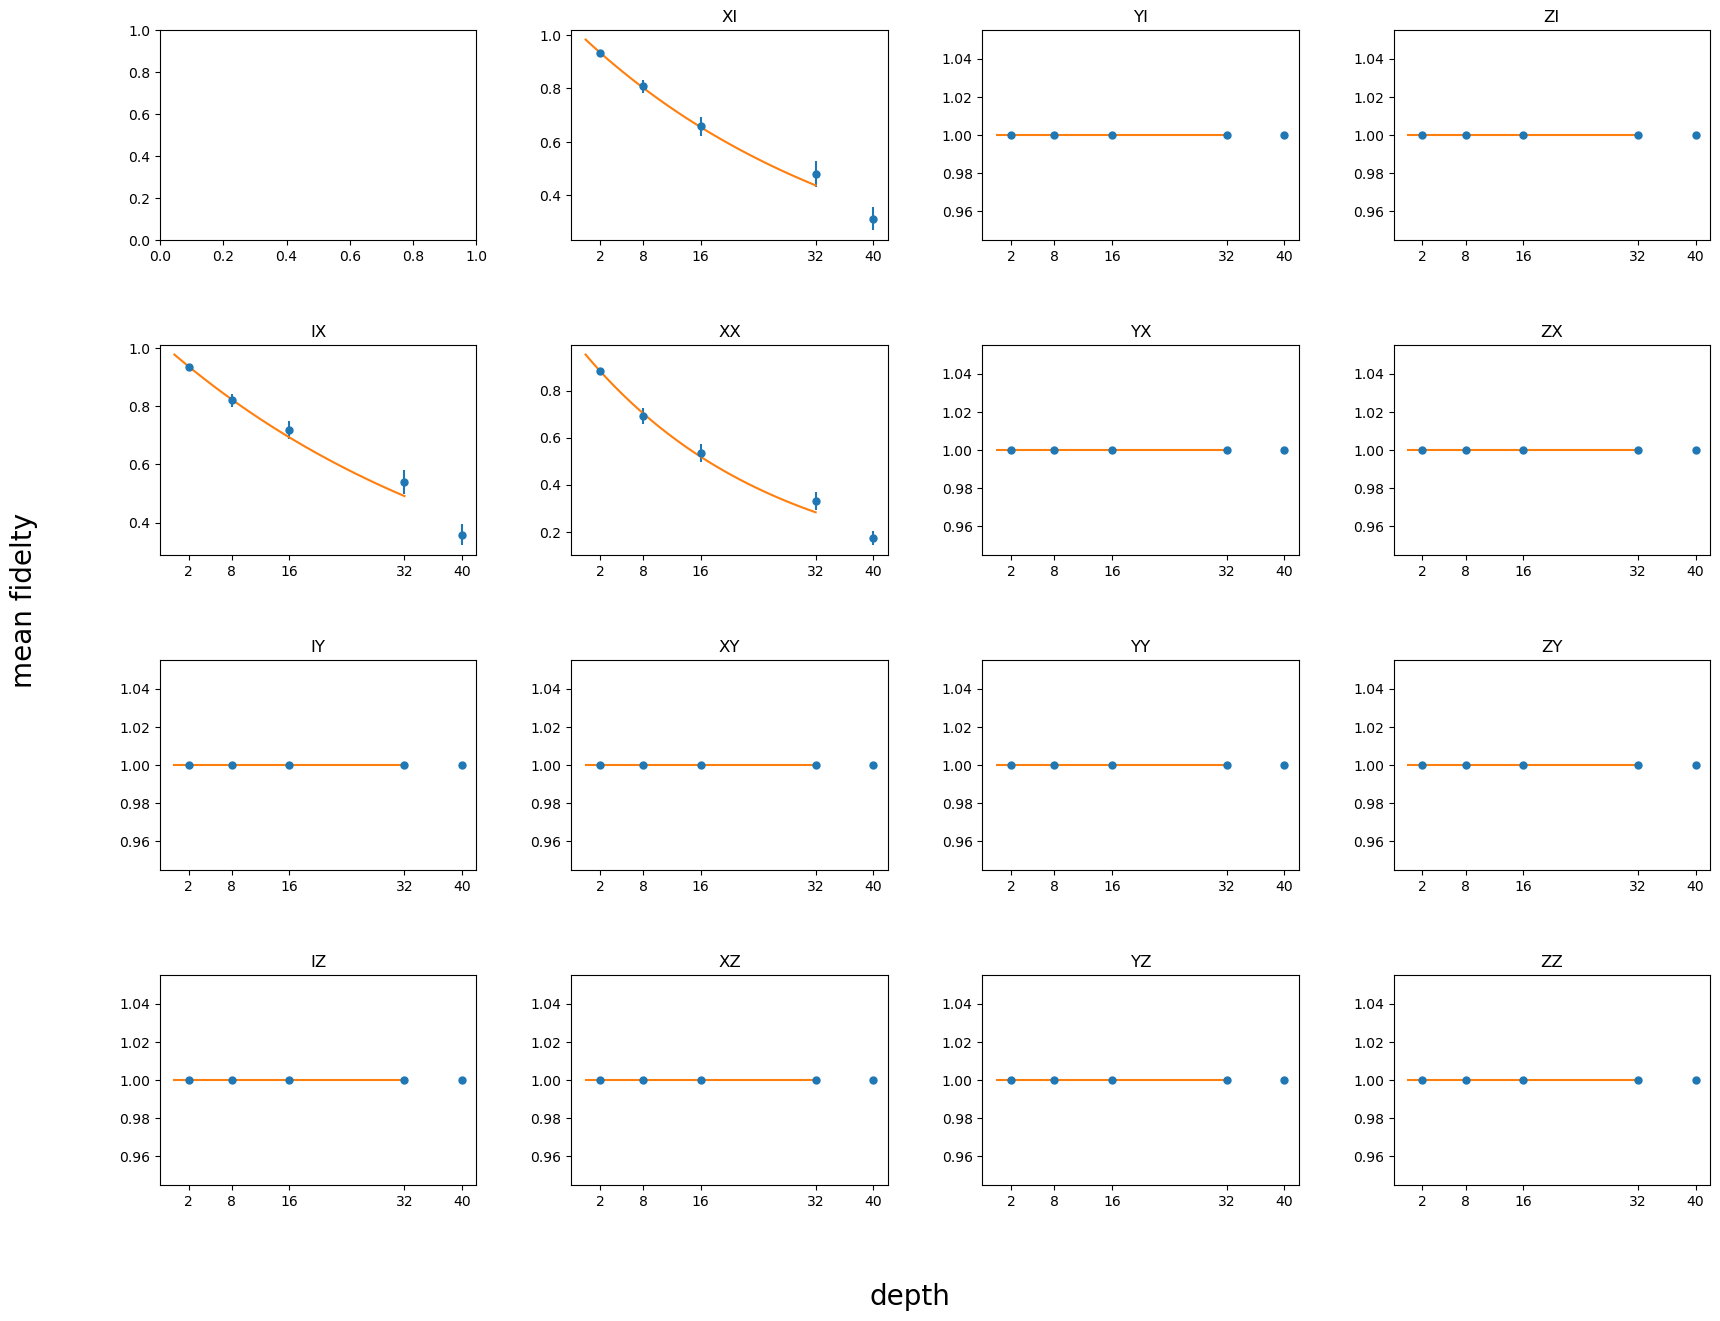

In [13]:
import sys
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/")
import CB_process_modified
import pdb
import itertools
'''Use these if read from file'''
# token = "8799418287"
# filename = "sim_cb_cnot_2023sep_9167558962"
# with open('/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_test/' + filename, 'rb') as infile:
#     cb_data = pickle.load(infile)

data=cb_data
full_raw_fidelity_list={}
n = data["n"]
pauli_sample_list = data["pauli_sample_list"]
'''Specify a set of Pauli you want to estimate'''
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = n)] #full

fidelity_list = {} 
stdev_list = {}
Yd3_dic={}
Yerrd3_dic={}
ad3_dic={}
for pauli_sample in pauli_sample_list:
    cb_data_temp = data[pauli_sample]

    # n = cb_data["parameters"]['n']
    # n_total = cb_data["parameters"]['n_total'] 
    shots = cb_data_temp ["parameters"]['shots'] 
    Lrange = [2,8,16,32,40]
    C = cb_data_temp ["parameters"]['C'] 
#     eps_readout = cb_data_temp ["parameters"]['eps_readout'] 
#     repeat = cb_data_temp ["parameters"]['repeat']
#     pdb.set_trace()
    cb_result = CB_process_modified.process_CB(n, C, shots, 1, Lrange, cb_data_temp , pauli_sample = pauli_sample, periodic=True,use_density_matrix=False, intercept_cb=False)
    raw_fidelity_list = cb_result["fidelity_list"]
    
    #correct nagetive values
    for key in raw_fidelity_list:
#     print (key)
        for dep in [2,8,16,32,40]:
            raw_fidelity_list[key][dep]=[abs(value) for value in raw_fidelity_list[key][dep] ]
        
    full_raw_fidelity_list.update(raw_fidelity_list)
    new_sub_label = []

    for sub_label in raw_fidelity_list.keys():
        if sub_label in fidelity_list:
            continue # wasteful!
        elif(sub_label == 'I'*n):
            fidelity_list[sub_label] = 1.0
            stdev_list[sub_label] = 0.0
        else:
#             alpha, alpha_err = CB_process_modified.fit_CB(Lrange, raw_fidelity_list[sub_label])
            alpha,a, alpha_err,Y, Yerr  = fit_CB_plot(Lrange, raw_fidelity_list[sub_label])
            fidelity_list[sub_label] = alpha
            stdev_list[sub_label] = alpha_err
            new_sub_label.append(sub_label)
            ad3_dic[sub_label]=a 
            Yd3_dic[sub_label]=Y
            Yerrd3_dic[sub_label]=Yerr


    print("CB setting: ",pauli_sample[::-1]," Pauli fidelities calculated: ", [sub_label[::-1] for sub_label in new_sub_label])


# print(fidelity_list)

# print(stdev_list)
print("Parameters: n = %d, C = %d, " % (n,C), "L = ", str(Lrange))



# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], 1-fidelity_list[pauli_label], stdev_list[pauli_label])
    
    
    
# plot_248={}
# plot_248=deepcopy(plot_dic)
# err_248=deepcopy(error_dic)
# print (Y248_dic)

x_c=np.linspace(0,32,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks([2,8,16,32,40])   
            axs[i, j].errorbar(Lrange,Yd3_dic[pauli_label], yerr=Yerrd3_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,ad3_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        
# for key in full_raw_fidelity_list:
#     print (key)

In [14]:
# error_list = fidelity_to_error(fidelity_list,n)
# print("Label / Pauli error rates")
# for pauli_label in pauli_request_list:
#     print(pauli_label[::-1], error_list[pauli_label])

Label / Pauli error rates
II 0.9947686150458944
XI -0.005231384954105592
YI 0.002570017056471516
ZI 0.002570017056471516
IX -0.005231384954105578
XX -0.005231384954105578
YX 0.002570017056471516
ZX 0.002570017056471516
IY 0.0020927210759790205
XY 0.002092721075978965
YY 0.0005686468216550972
ZY 0.0005686468216550972
IZ 0.0020927210759789927
XZ 0.002092721075978965
YZ 0.0005686468216550972
ZZ 0.0005686468216550972


Scatter plot: rersults from each circuit

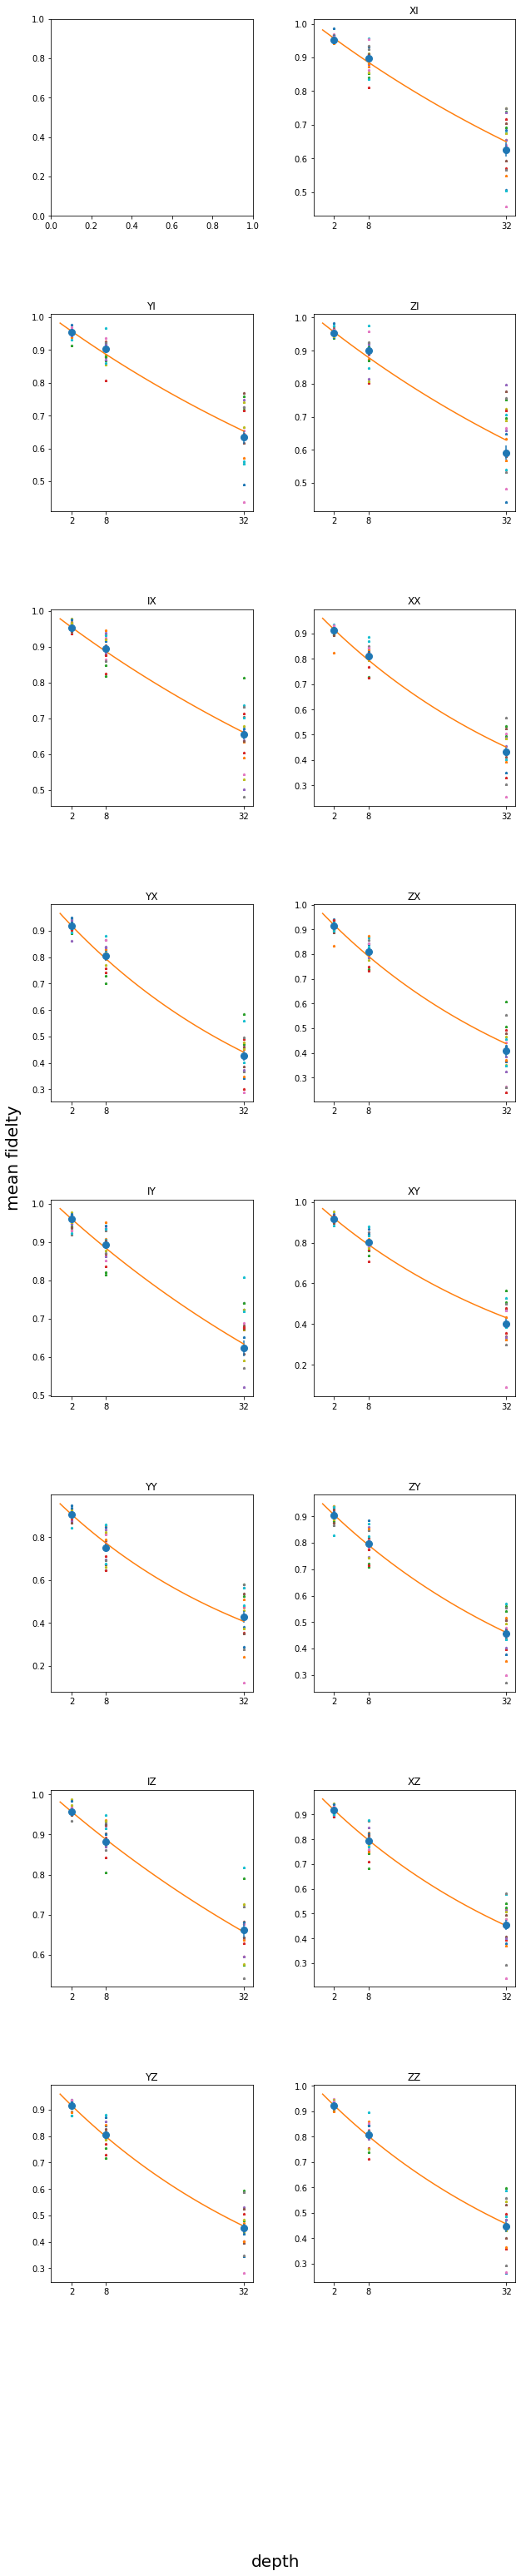

In [9]:
depth=Lrange
Y_full_dic=Yd3_dic
Yerr_full_dic=Yerrd3_dic
a_full_dic=ad3_dic
x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(8, 2)
fig.set_figwidth(10)
fig.set_figheight(50)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (8):
    for j in range(2):
        pauli_label=pauli_request_list[2*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
#             print ([tuple(eab_result['fidelity_list'][pauli_label][2])])
            axs[i, j].plot(depth,[tuple(full_raw_fidelity_list[pauli_label][L]) for L in depth],"*",markersize=3)
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=8)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
fig.savefig("fit_scatter.pdf", format="pdf", dpi=500)        

data analysis: bootstrapping (The figure in this section is the average over multiple bootstrap results. It is just a guide to the eye and it's not important. The extracted average Pauli infidelity is the only important quantity)

Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32, 40]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.002318008404080585
XI 0.0 0.0
YI 0.0 0.0
ZI 0.0 0.0
IX 0.0 0.0
XX 0.0370881 0.000479
YX 0.0 0.0
ZX 0.0 0.0
IY 0.0 0.0
XY 0.0 0.0
YY 0.0 0.0
ZY 0.0 0.0
IZ 0.0 0.0
XZ 0.0 0.0
YZ 0.0 0.0
ZZ 0.0 0.0
Label / Pauli error rates
II 0.9976819915959194
XI -0.0023180084040806542
YI 0.0023180084040806542
ZI 0.0023180084040806542
IX -0.0023180084040806404
XX -0.0023180084040806404
YX 0.0023180084040806542
ZX 0.0023180084040806542
IY 0.0023180084040806404
XY 0.0023180084040806404
YY -0.0023180084040806542
ZY -0.0023180084040806542
IZ 0.0023180084040806404
XZ 0.0023180084040806404
YZ -0.0023180084040806542
ZZ -0.0023180084040806542


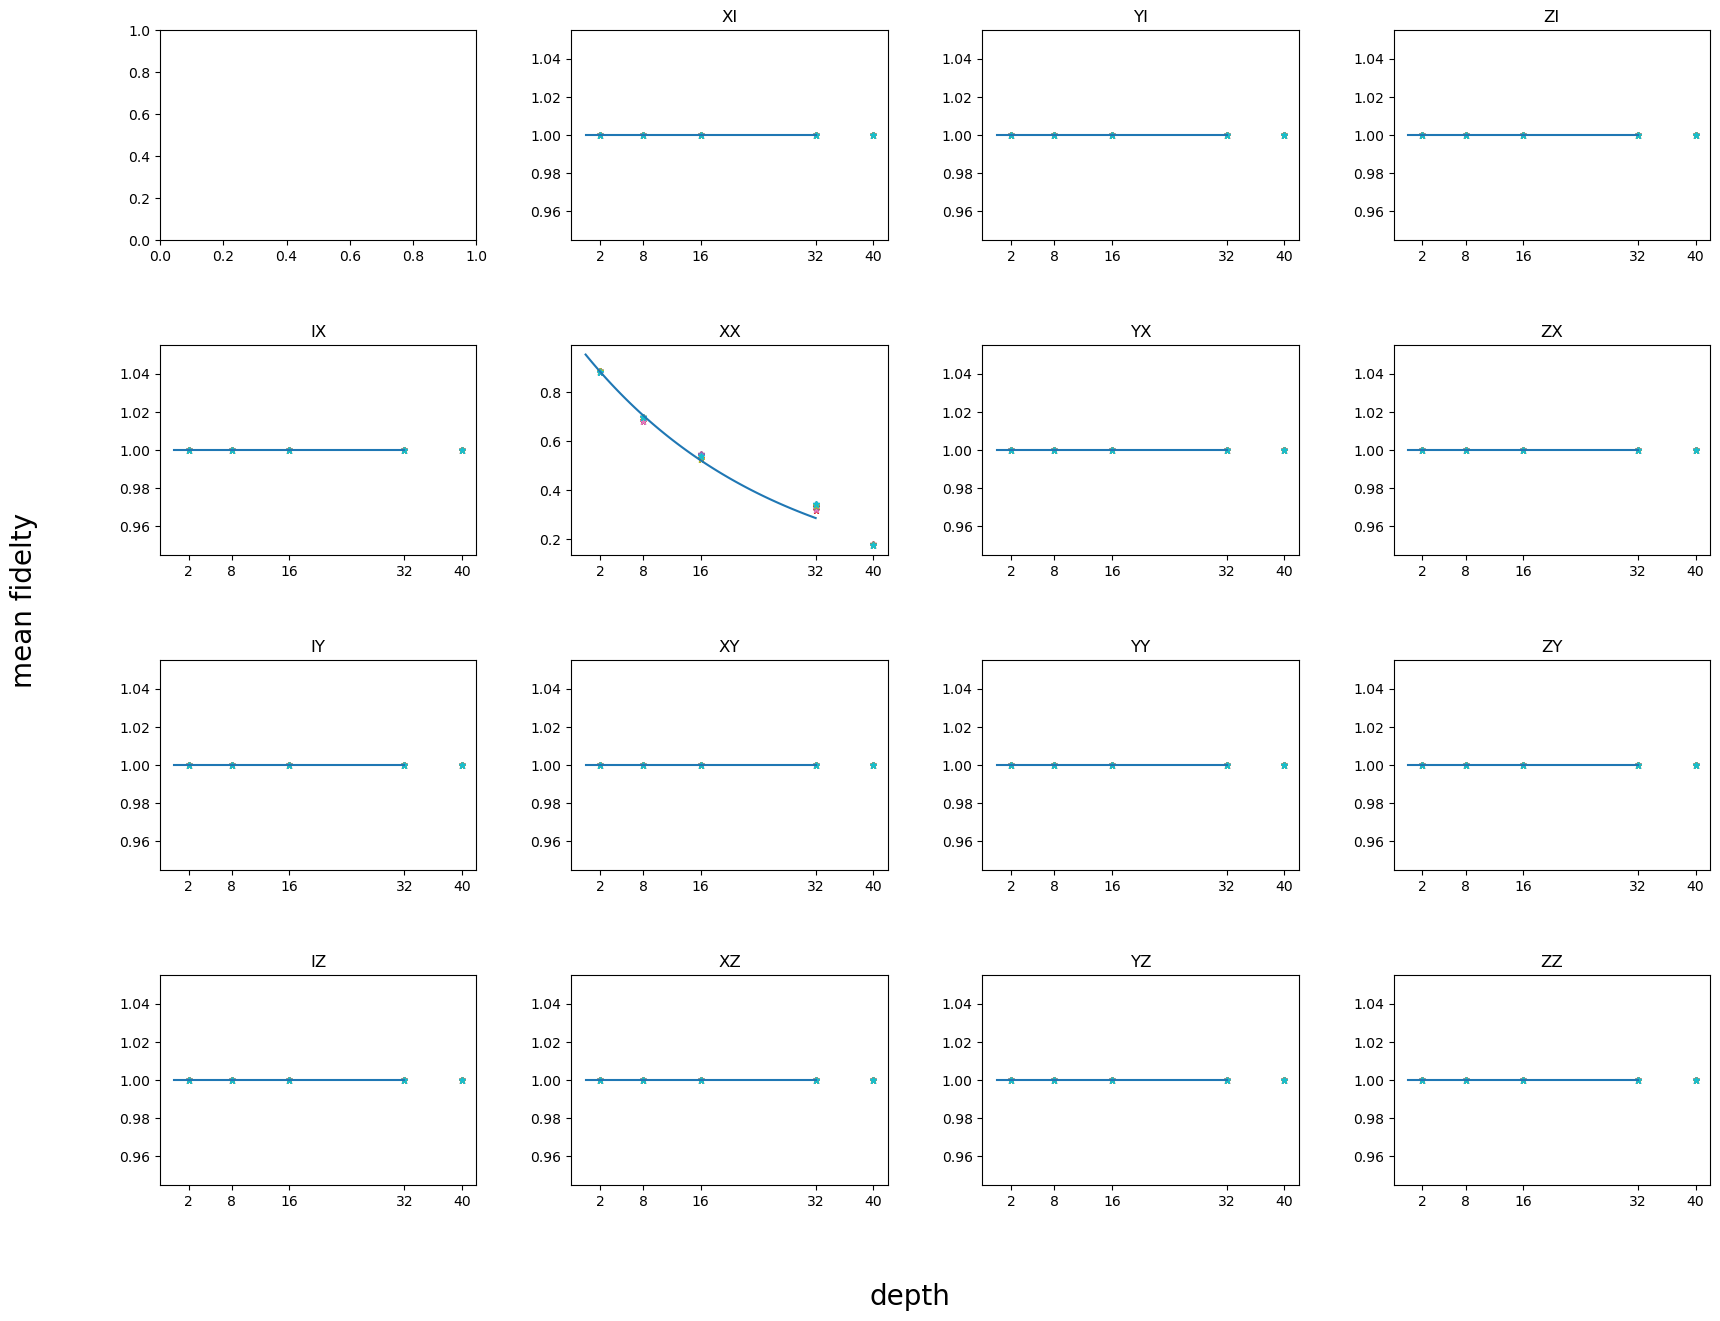

In [15]:
import bootstrap
# depth=[2,8,32]
raw_fidelity_list = full_raw_fidelity_list
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,8,16,32,40]
fidelity_list = {}
stdev_list = {}
alpha_detail={}
a_detail={}
alpha_error_detail={}
Y_detail={}
Y_err_detail={}
a_dic={}
Y_dic={}
Yerr_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],19)
        fidelity_list[pauli_label] = alpha_bootstrap #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err_bootstrap #error on pauli fidelity from fit
        alpha_detail[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit
        a_dic[pauli_label]=sum(a_rtn_frm_fit)/len(a_rtn_frm_fit)
        Y_detail[pauli_label]=Y_rtn_frm_fit
        Y_err_detail[pauli_label]=Yerr_rtn_frm_fit
        

#         for dep in [2,8,32]:
#             raw_fidelity_list[key][dep]=[abs(value) for value in raw_fidelity_list[key][dep] ]
        
for pauli_label in pauli_request_list:
    Y_dic[pauli_label]={}
    Y_dic[pauli_label][2]=[]
    Y_dic[pauli_label][8]=[]
    Y_dic[pauli_label][16]=[]
    Y_dic[pauli_label][32]=[]
    Y_dic[pauli_label][40]=[]
    if pauli_label=="II":
        for i in range (len(Y_detail["XX"])):
            Y_dic[pauli_label][2].append(1)
            Y_dic[pauli_label][8].append(1)
            Y_dic[pauli_label][16].append(1)
            Y_dic[pauli_label][32].append(1)
            Y_dic[pauli_label][40].append(1)
        continue
    else:
        for i in range (len(Y_detail[pauli_label])):
            Y_dic[pauli_label][2].append(Y_detail[pauli_label][i][0])
            Y_dic[pauli_label][8].append(Y_detail[pauli_label][i][1])
            Y_dic[pauli_label][16].append(Y_detail[pauli_label][i][2])
            Y_dic[pauli_label][32].append(Y_detail[pauli_label][i][3])
            Y_dic[pauli_label][40].append(Y_detail[pauli_label][i][4])
# print ("Y_dic")
# print (Y_dic)

        
print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))        
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        continue
    else:
        print (pauli_label[::-1],round(1-fidelity_list[pauli_label],7),round(stdev_list[pauli_label],7))

# print (alpha_detail[pauli_label])
error_list = fidelity_to_error(fidelity_list,n)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], error_list[pauli_label])

x_c=np.linspace(0,32,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].plot(depth,[tuple(Y_dic[pauli_label][L]) for L in depth],"*",markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])


plot how Pauli infidelities changes with layer


scatter plot: result from each circuit

# data analysis with bootstrapping

full set of data with bootstrapping

Method I: use the average of the 10 sets of Pauli fidelities from 10 times of resampling in bootstrapping


In [11]:
# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         continue
#     else:
#         print (pauli_label[::-1],round(1-fidelity_list[pauli_label],7),round(stdev_list[pauli_label],7))


# x_c=np.linspace(0,32,num=80)
# nqubit=2
# fig, axs = plt.subplots(4, 4)
# fig.set_figwidth(20)
# fig.set_figheight(15)
# fig.subplots_adjust(hspace=0.5,wspace=0.3) 
# fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
# fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
# #                 fidelity_list[pauli_label] = 1.0
# #                 stdev_list[pauli_label] = 0.0
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             for m in range (10):
#                 axs[i, j].errorbar(depth,Y_BS_dic[pauli_label][m], yerr=Yerr_BS_dic[pauli_label][m], fmt='o',markersize=5)
#                 axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_BS_dic[pauli_label][m], alpha_detail[pauli_label][m]))
#             axs[i, j].set_title(pauli_label[::-1])

# print (alpha_detail)    

Method II: use the average of the 10 sets of Y from resampling as the a new set of Y and do the fit once with the new Y


In [12]:
# raw_fidelity_list_avg={}
# for pauli_label in pauli_request_list:
#     raw_fidelity_list_avg[pauli_label]={}
#     raw_fidelity_list_avg[pauli_label][2]=[]
#     raw_fidelity_list_avg[pauli_label][4]=[]
#     raw_fidelity_list_avg[pauli_label][8]=[]
#     raw_fidelity_list_avg[pauli_label][16]=[]
#     raw_fidelity_list_avg[pauli_label][32]=[]
#     if (pauli_label=="II"):
#         raw_fidelity_list_avg[pauli_label][2]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][4]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][8]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][16]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][32]=[1.0]*10
#     else:
#         for i in range (10):
#             raw_fidelity_list_avg[pauli_label][2].append(Y_BS_dic[pauli_label][i][0])
#             raw_fidelity_list_avg[pauli_label][4].append(Y_BS_dic[pauli_label][i][1])
#             raw_fidelity_list_avg[pauli_label][8].append(Y_BS_dic[pauli_label][i][2])
#             raw_fidelity_list_avg[pauli_label][16].append(Y_BS_dic[pauli_label][i][3])
#             raw_fidelity_list_avg[pauli_label][32].append(Y_BS_dic[pauli_label][i][4])


# raw_fidelity_list = raw_fidelity_list_avg
# plot_dic={}
# error_dic={}
# # sys.exit(0)
# depth=[2,4,8,16,32]
# fidelity_list = {}
# stdev_list = {}
# a_full_dic={}
# Y_full_dic={}
# Yerr_full_dic={}
# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         fidelity_list[pauli_label] = 1.0
#         stdev_list[pauli_label] = 0.0
#     else:
#         alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
#         fidelity_list[pauli_label] = alpha #pauli fidelity from fit
#         stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
#         a_full_dic[pauli_label]=a 
#         Y_full_dic[pauli_label]=Y
#         Yerr_full_dic[pauli_label]=Yerr

# print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
# use_density_matrix=False
# use_readout_error =False
# shots=2000
# if use_density_matrix:
#     print("Density matrix based simulation")
# else:
#     print("Measurement based simulation, shots = %d" % shots)

# if use_readout_error is True:
#     print("Measurement bitflip rate = %f" % eps_readout)
# else:
#     print("No readout error")

# # Average fidelity
# print("Total error = ", 1-np.mean(list(fidelity_list.values())))

# print("Label / Pauli infidelity / Standard deviation")
# for pauli_label in pauli_request_list:
#     print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
# # print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
#     plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
#     error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


# plot_full={}
# plot_full=deepcopy(plot_dic)
# err_full=deepcopy(error_dic)
# print (Y_full_dic)

# x_c=np.linspace(0,32,num=80)
# nqubit=2
# fig, axs = plt.subplots(4, 4)
# fig.set_figwidth(20)
# fig.set_figheight(15)
# fig.subplots_adjust(hspace=0.5,wspace=0.3) 
# fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
# fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
# plt.rcParams.update({'font.size': 15})
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].errorbar(depth,[1,1,1,1,1], yerr=[0,0,0,0,0], fmt='o',markersize=8)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,1, [1,1,1,1,1]))
#             axs[i, j].set_title(pauli_label[::-1])
#             axs[i, j].set_ylim(bottom=0,top=1.05)
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=8)
#             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]),linewidth=3)
#             axs[i, j].set_title(pauli_label[::-1])
                
# # for pauli_label in pauli_request_list:
# #     fig.savefig("eab_fit", format="png", dpi=500)  
# fig.savefig("eab_fit.pdf", format="pdf", dpi=500)  

In [13]:
# error_list = fidelity_to_error(fidelity_list,nqubit)
# print("Label / Pauli error rates")
# for pauli_label in pauli_request_list:
#     print(pauli_label[::-1], round(error_list[pauli_label],7))


# Bootstrapping for different number of layers
Obtain the lists of:  
    alpha_detail[pauli_label]=alpha_rtn_frm_fit
    alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit
for different number of layers

plot alpha_detail vs. number of layers

In [14]:
######dpth=[2,8]
raw_fidelity_list = full_raw_fidelity_list
# raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d2={}
alpha_error_detail_d2={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d2[pauli_label] = [1.0]*10
        alpha_error_detail_d2[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d2[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d2[pauli_label]=alpha_err_rtn_frm_fit
print (alpha_detail_d2)

######dpth=[2,4,8]
# raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8,32]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d3={}
alpha_error_detail_d3={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d3[pauli_label] = [1.0]*10
        alpha_error_detail_d3[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d3[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d3[pauli_label]=alpha_err_rtn_frm_fit
print (alpha_detail_d3)

#####dpth=[2,4,8,16]
# raw_fidelity_list = eab_result["fidelity_list"]
depth=[8,32]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d4={}
alpha_error_detail_d4={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d4[pauli_label] = [1.0]*10
        alpha_error_detail_d4[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d4[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d4[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_2)

# ####depth=[2,4,8,16,32]
# alpha_detail_d5={}
# alpha_error_detail_d5={}
# alpha_detail_d5= alpha_detail
# alpha_error_detail_d5=alpha_error_detail
# alpha_detail_d5["II"] = [1.0]*10
# alpha_error_detail_d5["II"] = [0.0]*10

{'II': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'IX': [0.9880031849527167, 0.9884687454442453, 0.9867033491510365, 0.9866615362691459, 0.9871693755852822, 0.9889668256354063, 0.9879741589847791, 0.9879719489569581, 0.9876041987622991, 0.9878558667206359], 'IY': [0.9895099042275711, 0.9901824191871267, 0.9896817039132794, 0.9888048200786319, 0.9898637327905615, 0.9897057014472959, 0.9900184344496935, 0.9896455581967304, 0.9877485088072916, 0.9907117593249244], 'IZ': [0.9895071869109646, 0.9866526509018686, 0.9886243267596201, 0.9870280189768244, 0.9892490039913149, 0.9872885287923837, 0.9885793566750846, 0.9890802737382228, 0.9885539554869442, 0.9878329585898858], 'XI': [0.9873758013534537, 0.9886275825655931, 0.9886824401985818, 0.9888366056882325, 0.9888707373434712, 0.987108637216071, 0.9869215408912293, 0.9890445713328344, 0.9887995148223833, 0.9893594395030786], 'XX': [0.9802463144692257, 0.9807221280033329, 0.9796890874319154, 0.9822791242120876, 0.9818304864166404, 0.9

In [16]:
# filename = str(uuid.uuid4())
filename="CB_alpha_detail_d2"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d2, fp)

filename="CB_alpha_detail_d3"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d3, fp)
filename="CB_alpha_detail_d4"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d4, fp)

In [18]:
##plot  alpha_detail vs. depth
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
# fig.set_figwidth(30)
# fig.set_figheight(15)
# fig.subplots_adjust(hspace=0.5,wspace=0.3) 
# fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
# fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
matplotlib .rc('xtick', labelsize=20) 
matplotlib .rc('ytick', labelsize=20) 
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],color=pal[7],marker="*",markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],color=pal[3],marker="*",markersize=15,label='depth 3')
plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],color=pal[0],marker="*",markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')

legend_elements = [Line2D([0], [0], marker='*', color='r', label='[2,8]',markerfacecolor='r', markersize=25),
                   Line2D([0], [0], marker='*', color='b', label='[2,8,32]',markerfacecolor='b', markersize=25),
                   Line2D([0], [0], marker='*', color='g', label='[8,32]',markerfacecolor='g', markersize=25),
#                    Line2D([0], [0], marker='*', color='m', label='[2,4,8,16,32]',markerfacecolor='m', markersize=25),
                  ]

plt.legend(handles=legend_elements, loc='upper center',fontsize=25)

# # plt.legend()
# # for pauli_label in pauli_request_list:
# # fig.savefig("fit.pdf", format="pdf", dpi=500)  

# plt.figure(figsize=(30,20))
# # plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
# # plt.legend()
# legend_elements = [
# #     Line2D([0], [0], marker='*', color='r', label='[2,4]',markerfacecolor='r', markersize=25),
#                    Line2D([0], [0], marker='*', color='b', label='[2,4,8]',markerfacecolor='b', markersize=25),
#                    Line2D([0], [0], marker='*', color='g', label='[2,4,8,16]',markerfacecolor='g', markersize=25),
#                    Line2D([0], [0], marker='*', color='m', label='[2,4,8,16,32]',markerfacecolor='m', markersize=25),
#                   ]

# plt.legend(handles=legend_elements, loc='upper center',fontsize=25)

NameError: name 'pal' is not defined

<Figure size 2160x1440 with 0 Axes>

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# y = [(1,1,2,4)]
# x = [2]
# plt.plot(x,[tuple(eab_result['fidelity_list'][pauli_label][2])],"r*")
# plt.show()

In [ ]:

# b=[]
# c=[1,2]
# f=c
# c=[1]
# print (d)
# print (b)
# print (c)